# EDA Individual Project

## "Has social media influenced Spanish society's opinion on feminism (or antifeminism)?"

## Table of Contents

- [Influencers initial dataset](#influencers-initial-dataset)
  - [Visual Insights](#visual-insights)
  
- [Influencers content dataset](#influencers-content-dataset)

- [Feminism and Antifeminism Codebook](#feminism-and-Antifeminism-codebook)


In [2]:
# TO INSTALL
!pip install -U pip setuptools wheel
!pip install -U spacy

In [3]:
import spacy
spacy_nlp = spacy.load("en_core_web_sm") #moverlo abajo

In [4]:
#purpuse--> i'm going to traing to explain, and the basic ideas I have
# got from diferents sources. They will try to support what im trying to explain in my project. 
# during what period?? I got this info from datas and sources taken from librearies social media during 2022

In [5]:
#pip install pandas openpyxl
import pandas as pd
import re

from io import StringIO #??

## Influencers initial dataset

In [6]:
path_file_influencers = r"C:\Users\Celeste\Google Drive Streaming\My Drive\_CODEOP\EDA_Feminism_Influencers_Spain\data\Influencers Initial Dataset.xlsx"

df_influencers = pd.read_excel(path_file_influencers)

df_influencers.head()

#repasar signos de puntuación "brackets", "curly brackets", "colon" "quotation marks", "slash"

#these are the fountains where I got enough material to do my research, different kind of information

,id,influencer's name,real name,age,ref. edad,education,ref. educacion,previous_occupation,ref. ocupacion,main platform,secondary platform,# follower,link_plataforma
0,1,Ibai Llanos,Ibai Llanos Garatea,28,Ibai Llanos - Wikiwand,4,https://www.wikiwand.com/es/Ibai_Llanos,Narrador esports,▷ Ibai Llanos Wiki ≫ Biografía de este Influen...,Twitch,Youtube,"12,8M",ibai - Twitch
1,2,Maria Pombo,María Pombo,28,https://www.modelocurriculum.net/biografias/in...,4,https://www.modelocurriculum.net/biografias/in...,NaN,NaN,Instagram,NaN,"2,9M",https://www.instagram.com/mariapombo/
2,3,Naim Darrechi,Naim Darrechi,20,https://historia-biografia.com/naim-darrechi/,NaN,NaN,-,-,TikTok,Instagram,29M,https://www.tiktok.com/@naimdarrechi?lang=es
3,4,Jordi Wild,Jordi Carrillo de Albornoz Torres,38,▷ Jordi Wild Wiki ≫ Biografía de este Influenc...,6,▷ Jordi Wild Wiki ≫ Biografía de este Influenc...,-,NaN,YouTube,Twitter,"3,59M",The Wild Project - YouTube
4,5,Iker Unzu,Iker Unzueta Ramos,18,"Iker Unzu - Edad, Familia, Biografía | Famous ...",3,Iker Unzu | Wiki YouTube Pedia | Fandom,-,-,TikTok,YouTube,"11,4M",Iker Unzu (@ikerunzu) oficial | TikTok


In [7]:
df_influencers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   26 non-null     int64 
 1   influencer's name    26 non-null     object
 2   real name            26 non-null     object
 3   age                  26 non-null     int64 
 4   ref. edad            25 non-null     object
 5   education            23 non-null     object
 6   ref. educacion       23 non-null     object
 7   previous_occupation  25 non-null     object
 8   ref. ocupacion       24 non-null     object
 9   main platform        26 non-null     object
 10  secondary platform   24 non-null     object
 11  # follower           26 non-null     object
 12  link_plataforma      25 non-null     object
dtypes: int64(2), object(11)
memory usage: 2.8+ KB


In [8]:
df_influencers.shape

(26, 13)

In [10]:
df_influencers.isna().sum() 

id                     0
influencer's name      0
real name              0
age                    0
ref. edad              1
education              3
ref. educacion         3
previous_occupation    1
ref. ocupacion         2
main platform          0
secondary platform     2
# follower             0
link_plataforma        1
dtype: int64

In [14]:
#remove columns 

df_influencers = df_influencers.drop(['id','real name', 'ref. edad', 'education','ref. educacion', 'previous_occupation', 'ref. ocupacion','link_plataforma'], axis = 1) 

In [15]:
df_influencers #at this point I am able to see whhat I want to analize

,influencer's name,age,main platform,secondary platform,# follower
0,Ibai Llanos,28,Twitch,Youtube,"12,8M"
1,Maria Pombo,28,Instagram,NaN,"2,9M"
2,Naim Darrechi,20,TikTok,Instagram,29M
3,Jordi Wild,38,YouTube,Twitter,"3,59M"
4,Iker Unzu,18,TikTok,YouTube,"11,4M"
5,ElRubius,33,YouTube,Twitch,"40,4M"
6,Samantha Hudosn,23,Instagram,Twitter,308K
7,Roma Gallardo,34,YouTube,Twitter,"1,75M"
8,DalasReview,26,YouTube,Twitter,"10,5M"
9,Sindy Takanashi,30,Instagram,NaN,264K


In [16]:
df_influencers.describe() #about numerical data in dataframe

,age
count,26.000000
mean,29.807692
std,6.026735
min,18.000000
25%,26.500000
50%,29.500000
75%,33.000000
max,45.000000


In [17]:
df_influencers.describe(exclude='number') #explicar este cuadro, interesante

,influencer's name,main platform,secondary platform,# follower
count,26,26,24,26
unique,26,4,6,26
top,Ibai Llanos,YouTube,Twitter,"12,8M"
freq,1,12,8,1


In [18]:
df_influencers.rename(columns={'# follower': 'followers'}, inplace=True) 

In [19]:
df_influencers['followers'] #I am going to do a simple process in which I transform objects to numbers using "apply" and "lamda" functions

0     12,8M
1      2,9M
2       29M
3     3,59M
4     11,4M
5     40,4M
6      308K
7     1,75M
8     10,5M
9      264K
10     3,2M
11    1,53M
12     1,9M
13     2,2M
14     468K
15     207K
16     1,5M
17     2,8M
18    1,36M
19    17,9M
20     323K
21     699K
22     166K
23    10,2M
24    8,71M
25    3,23M
Name: followers, dtype: object

In [20]:
df_influencers['followers'] = df_influencers['followers'].apply(lambda x: float(x.replace('M', '').replace('K', '').replace(',', '.')) * 1e6)

# df['followers'].str.replace("M","")
# df['followers'].str.replace("K","")
# pd.to_numeric(df['followers']) cuando de error, mirarlo y to_numerci dice qué caracter

In [21]:
df_influencers['followers']  #this is just the "sanity checking"

0      12800000.0
1       2900000.0
2      29000000.0
3       3590000.0
4      11400000.0
5      40400000.0
6     308000000.0
7       1750000.0
8      10500000.0
9     264000000.0
10      3200000.0
11      1530000.0
12      1900000.0
13      2200000.0
14    468000000.0
15    207000000.0
16      1500000.0
17      2800000.0
18      1360000.0
19     17900000.0
20    323000000.0
21    699000000.0
22    166000000.0
23     10200000.0
24      8710000.0
25      3230000.0
Name: followers, dtype: float64

### Visual Insights

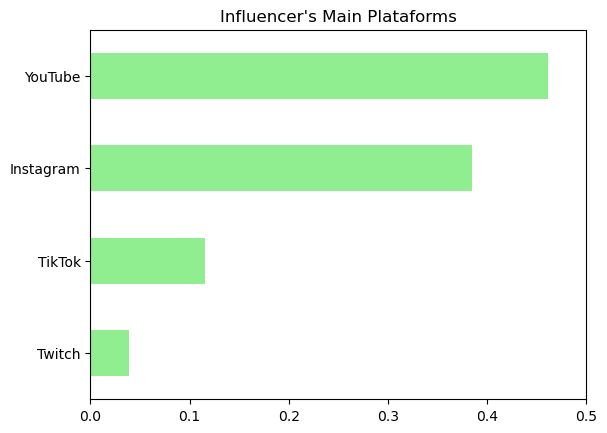

In [22]:
import matplotlib.pyplot as plt

# Barchart of main platforms
df_influencers['main platform'].value_counts(ascending=True, normalize=True).plot(kind='barh', color='lightgreen')
plt.title('Influencer\'s Main Plataforms')
# plt.xlabel('Plataform')
plt.ylabel('')
plt.xlim(0, 0.5)
plt.show()

#que pretendo con este plot.? add porcentage? stronger msg

# I am starting using plots to visualize the datast 

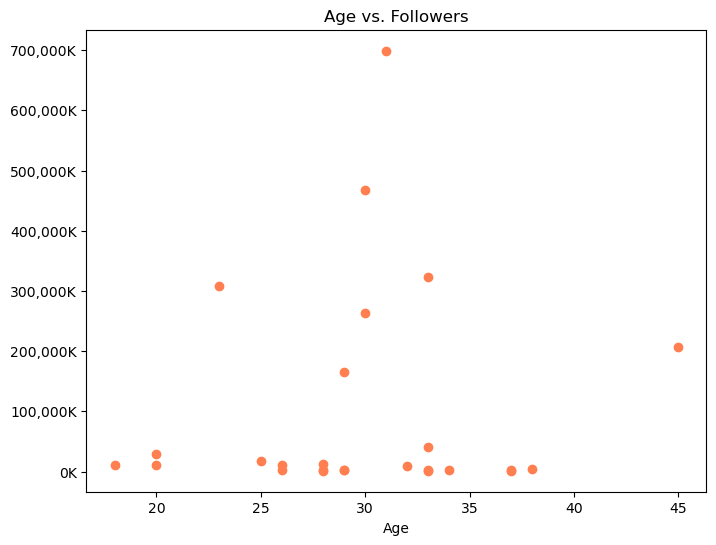

In [23]:
import matplotlib.ticker as ticker

plt.figure(figsize=(8, 6))
plt.scatter(df_influencers['age'], df_influencers['followers']/1000, color='coral')
plt.title('Age vs. Followers')
plt.xlabel('Age')
plt.ylabel('')

#  Formato de  ejes
ax = plt.gca()  
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}K'))  # formato sin notación científica, 
plt.show()


#chek the values/nr
# Scatterplot age vs. follower
#  I want to find out if there is any relation in between age and followers, then I'm going to print out a Scatterplot

# when we are watching this graphuics, or looking at thhis grafcit, you can see that the ponts are in a shape of T, what does it mean? 
# patrones?? patterns

In [24]:
import seaborn as sns
from scipy.stats import pearsonr

#I expect to find any correlation in between these two variables
# correlación
correlation, alfa = pearsonr(df_influencers['age'], df_influencers['followers'])
print(f'Correlación entre edad y número de seguidores: {correlation:.2f}')

#no correlation

print(alfa) #need to read about it, p value gives me the certainty I can trust this number. All in all, 

#it is non linear 


Correlación entre edad y número de seguidores: 0.09
0.6551948246009751


In [25]:
#pearsonr? #high p value

## Influencers content dataset

In [26]:
path_file_content = r"C:\Users\Celeste\Google Drive Streaming\My Drive\_CODEOP\EDA_Feminism_Influencers_Spain\data\Influencers Content Analysis (September 22nd_December 22nd).xlsx"

df_content = pd.read_excel(path_file_content)

df_content.head(15)

,Influencer's Name,Week,Codification,Main phrase or publication,Time Stamp,Social Media Platform,Link,General description of the content (in Spanish),# Publication in this week,Views/Likes
0,Andrea Compton,19 Septiembre - 25 Septiembre,98,Sin contenido,NaN,Youtube,NaN,NaN,NaN,NaN
1,Andrea Compton,26 Septiembre - 2 Octubre,34,LAS MEJORES ESCENAS DE JUEGO DE TRONOS | Andre...,NaN,Youtube,https://www.youtube.com/watch?v=sO7idHTgtPE&ab...,Video de Andrea Compton comentando las escenas...,1.0,7500
2,Andrea Compton,3 Octubre - 9 Octubre,35,HABLEMOS DE LANA DEL REY | Andrea Compton,NaN,Youtube,https://www.youtube.com/watch?v=n-Ytp6PARis&ab...,Video de Andrea Compton hablando de la vida de...,1.0,15000
3,Andrea Compton,10 Octubre - 17 Octubre,98,Sin contenido,NaN,Youtube,NaN,NaN,NaN,NaN
4,Andrea Compton,17 Octubre - 23 Octubre,34,REPASANDO THE WALKING DEAD (LAS 11 TEMPORADAS)...,NaN,Youtube,https://www.youtube.com/watch?v=H7HJtE1L_zE&ab...,Video de Andrea Compton comentando 'The walkin...,1.0,10000
5,Andrea Compton,24 Octubre - 30 Octubre,34,COMENTANDO HOUSE OF THE DRAGON *CON SPOILERS* ...,NaN,Youtube,https://www.youtube.com/watch?v=W-b9Yyxrma8&ab...,Video de Andrea Compton comentando 'House of t...,2.0,8500
6,Andrea Compton,31 Octubre - 6 Noviembre,98,Sin contenido,NaN,Youtube,NaN,NaN,NaN,NaN
7,Andrea Compton,7 Noviembre - 13 Noviembre,"23, 34","""-Luego se desarrolló y tenía muchísimo pecho ...",03:02,Youtube,https://www.youtube.com/watch?v=YvFewYdU6g4&ab...,Video de Andrea Compton con Jedet comentando l...,1.0,10000
8,Andrea Compton,14 Noviembre - 20 Noviembre,43,COMENTANDO ONE DIRECTION: THIS IS US | ft Berr...,NaN,Youtube,COMENTANDO ONE DIRECTION: THIS IS US | ft Berr...,Video de Andrea Compton con Berry y Carlos Peg...,1.0,8500
9,Andrea Compton,21 Noviembre - 27 Noviembre,98,Sin contenido,NaN,Youtube,NaN,NaN,NaN,NaN


In [27]:
df_content.infodf_content.shape

AttributeError: 'DataFrame' object has no attribute 'infodf_content'

In [96]:
df_content['Codification'].value_counts()


Codification
32            53
98            52
30            20
32, 47        14
45            13
              ..
36, 42         1
19, 36, 47     1
19, 32         1
42, 47         1
31. 47         1
Name: count, Length: 126, dtype: int64

In [97]:
cod_36 = df_content[df_content['Codification'] == 36]


In [150]:
cod_36.head(15)

,Influencer's Name,Week,Codification,Main phrase or publication,Time Stamp,Social Media Platform,Link,General description of the content (in Spanish),# Publication in this week,Views/Likes
126,Iker Unzu,19 Septiembre - 25 Septiembre,36,Lol #parati #ikerunzu,NaN,TikTok,https://www.tiktok.com/@ikerunzu/video/7146618...,Video en el que aparece probando un filtro com...,7.0,1300000
128,Iker Unzu,3 Octubre - 9 Octubre,36,Será verdad? 😂 @palomaresmagic #stitch #para...,NaN,TikTok,https://www.tiktok.com/@ikerunzu/video/7150351...,Intenta replicar un truco que sale mal y deja ...,2.0,2500000
132,Iker Unzu,31 Octubre - 6 Noviembre,36,Aunque lo abriese silenciosamente 😂 #parati #...,NaN,TikTok,https://www.tiktok.com/@ikerunzu/video/7161469...,Simula cuando abrías un paquete de galletas en...,5.0,5700000
133,Iker Unzu,7 Noviembre - 13 Noviembre,36,Tú lo sabías?! 😂 #parati #fyp #ikerunzu #gr...,NaN,TikTok,https://www.tiktok.com/@ikerunzu/video/7164838...,Quejándose de que TikTok avisa al resto de usu...,1.0,2600000
137,Iker Unzu,5 Diciembre - 11 Diciembre,36,Las batallas de baile son lo mejor 😂 #parati ...,NaN,TikTok,https://www.tiktok.com/@ikerunzu/video/7174850...,Mofándose de las batallas de baile que aparece...,3.0,6400000
138,Iker Unzu,12 Diciembre - 18 Diciembre,36,El final 😂 #parati #fyp #ikerunzu,NaN,TikTok,https://www.tiktok.com/@ikerunzu/video/7176355...,Probando un filtro de IA que te dibuja como si...,3.0,3100000
139,Iker Unzu,18 Diciembre - 24 Diciembre,36,Yo nunca me fui 🤫 #parati #fyp #ikerunzu,NaN,TikTok,https://www.tiktok.com/@ikerunzu/video/7179698...,Video de terror,2.0,2300000
154,Ines Hernand,19 Septiembre - 25 Septiembre,36,lo que nos faltaba,NaN,Instagram,https://www.instagram.com/p/Ci7VvnJKYKN/,Video de Ines Hernand en el que explica la rel...,3.0,23312
283,Samantha Hudson,10 Octubre - 17 Octubre,36,"""Palabras que enamoran #felizsemana""",NaN,Instagram,https://www.instagram.com/reel/Cj_F1oPrJXA/,Video en tono de humor acerca de lo que signif...,2.0,8129
319,Vecinarubia,5 Diciembre - 11 Diciembre,36,"No es lo que pasa, sino cómo nos tomamos lo qu...",NaN,Instagram,La Vecina Rubia (@lavecinarubia) • Fotos y vid...,Contenido de humor blanco y sobre vestidos de ...,3.0,42009


In [122]:
df_content['Codification'].unique() #tengo que , por cada numero que haya en la codification, repetir el row tantas veces como número, que cada row tenga un solo numero

array([98, 34, 35, '23, 34', 43, '34, 36', '34, 35, 36', 45, 46, 27,
       '20, 22, 23, 27, 46', '27, 46', '20, 25, 43', '35, 44', '26, 43',
       '20, 24, 43', '32, 43', '43, 48', '1, 5, 10, 32', '45, 46',
       datetime.datetime(2017, 5, 1, 0, 0),
       datetime.datetime(1946, 11, 3, 0, 0), '3, 6, 10, 15, 16, 45',
       '1, 2, 8, 10, 15, 16, 45', '5, 10, 15, 17, 45', '1, 10, 15, 16,45',
       '5, 10, 15, 16, 17, 45', '5, 8, 15, 16, 17, 45', '10, 19, 45',
       '5, 10, 16, 45', 30, '32, 47', 41, '41, 45', '31, 47', 32,
       '31, 32', 26, '30, 32, 40', '30, 36', '33, 39', '14, 45', '45, 47',
       33, '42, 47', 36, '19, 32', '19, 36', '19, 36, 47', '36, 42',
       '30, 47', '20, 23, 29, 43, 47', '21, 22, 27, 29, 43, 47', '23, 48',
       '43, 47', '20, 27, 43, 47', '35, 47', '21. 22, 23, 27, 29, 48',
       '35, 43', '27, 43', '13, 14, 43', '14, 43', '6, 14, 43',
       '9, 10, 11, 12, 13, 43', '1, 10, 12, 13, 43', '3, 43',
       '10, 12, 13, 43', '7, 18, 43', '10, 11, 12, 

## Feminism and Antifeminism Codebook

In [100]:
import matplotlib.pyplot as plt
import nltk

from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [101]:
path_file_codebook = r"C:\Users\Celeste\Google Drive Streaming\My Drive\_CODEOP\EDA_Feminism_Influencers_Spain\data\Codebook - Feminism and Anti-feminism.xlsx"

df_codebook = pd.read_excel(path_file_codebook)

df_codebook.head()

,ID,Code,Definition,Survey question / comments,Category,Sub-category,Feminism Stance
0,1,Equating feminism and machismo,"They do not deny discrimination against women,...","""Tan peligroso es el machismo como el feminism...",Antifeminism,Explicit,Strongly opposing feminism
1,2,Denying the necessity of feminism,Emphasizing equality as the real goal and impl...,"""Lo importante no es el feminismo ni el machis...",Antifeminism,Explicit,Moderatedly opposing feminism
2,3,Minimizing gender inequality at the workplace,Skepticism about gender inequality in the work...,"""Las mujeres exageran los problemas que tienen...",Antifeminism,Latent,Opposing feminist issues
3,4,Supporting paternalistic behaviours,Defending the persistence of paternalistic beh...,"""Los hombres deberían proteger a las mujeres """,Antifeminism,Latent,Opposing feminist issues
4,5,Minimizing Sexual Harassment,Accusing women of overreacting to flirting or ...,"""Actualmente las mujeres malinterpretan cualqu...",Antifeminism,Latent,Opposing feminist issues


In [138]:
df_codebook['code'].nunique()

48

In [154]:
df_content['Codification'].nunique()

126

In [155]:
df_codebook['id'].nunique() #unir las tablas con id, repetir las rows

48

In [102]:
df_codebook.shape

(48, 7)

In [103]:
# Convert column names to lowercase and replace characters

df_codebook.columns = df_codebook.columns.str.lower()
df_codebook.columns = df_codebook.columns.str.replace(' / ', '_').str.replace(' ', '_').str.replace('-', '_')

print(df_codebook.columns)
df_codebook.head()

Index(['id', 'code', 'definition', 'survey_question_comments', 'category',
       'sub_category', 'feminism_stance'],
      dtype='object')


,id,code,definition,survey_question_comments,category,sub_category,feminism_stance
0,1,Equating feminism and machismo,"They do not deny discrimination against women,...","""Tan peligroso es el machismo como el feminism...",Antifeminism,Explicit,Strongly opposing feminism
1,2,Denying the necessity of feminism,Emphasizing equality as the real goal and impl...,"""Lo importante no es el feminismo ni el machis...",Antifeminism,Explicit,Moderatedly opposing feminism
2,3,Minimizing gender inequality at the workplace,Skepticism about gender inequality in the work...,"""Las mujeres exageran los problemas que tienen...",Antifeminism,Latent,Opposing feminist issues
3,4,Supporting paternalistic behaviours,Defending the persistence of paternalistic beh...,"""Los hombres deberían proteger a las mujeres """,Antifeminism,Latent,Opposing feminist issues
4,5,Minimizing Sexual Harassment,Accusing women of overreacting to flirting or ...,"""Actualmente las mujeres malinterpretan cualqu...",Antifeminism,Latent,Opposing feminist issues


In [135]:
df_codebook['feminism_stance'].unique() #replace 

array(['Strongly opposing feminism', 'Moderatedly opposing feminism',
       'Opposing feminist issues',
       'Content expressing opinions or behaviors of a sexist or anti feminist nature, but the content does not directly address the feminism-antifeminism debate.\n',
       'Exhibiting traditional gender stereotyping. Content expressing opinions or behaviors of a sexist or anti feminist nature, but the content does not directly address the feminism-antifeminism debate.',
       'Strongly supporting feminism', 'Supporting feminist issues',
       'Suporting feminist issues', 'Content niche',
       'Content characteristics', 'Content format',
       'No content of any type during the week'], dtype=object)

In [148]:
df_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Influencer's Name                                364 non-null    object 
 1   Week                                             364 non-null    object 
 2   Codification                                     364 non-null    object 
 3   Main phrase or publication                       362 non-null    object 
 4   Time Stamp                                       69 non-null     object 
 5   Social Media Platform                            353 non-null    object 
 6   Link                                             312 non-null    object 
 7   General description of the content (in Spanish)  307 non-null    object 
 8   # Publication in this week                       313 non-null    float64
 9   Views/Likes                     

ir al objetivo, encasillar los youtuber como uno u otro y relaiconarlo con followers

In [149]:
df_codebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        48 non-null     int64 
 1   code                      48 non-null     object
 2   definition                29 non-null     object
 3   survey_question_comments  21 non-null     object
 4   category                  48 non-null     object
 5   sub_category              28 non-null     object
 6   feminism_stance           48 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.8+ KB


In [ ]:
df_content_split = df_content.assign(code = df_content['codification'].str.split(',')).explode['Codification']